### Análise de dados - Fatura Cartão de Crédito

##### Lógica de aplicação

* 1 - Instalar e importar as bibliotecas necessárias

* 2 - Ler e organizar os dados do aquivo fatura.csv

* 3 - Iniciar análise dos dados

* 4 - Gerar informações gerais sobre os dados e gráficos

Passo 01: Instalar e carregar as bibliotecas necessárias:

In [ ]:
%pip install pandas
%pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Passo 02: Ler a base de dados e organiza-la:

In [ ]:
dados = pd.read_csv('fatura.csv')
dados

Passo 03: Iniciar a análise de dados 

* Valor total da fatura

In [9]:
valor_total_cartao = dados['ValorCompra'].sum()
print (f"Valor total da fatura: R${valor_total_cartao:,.2f}")

Valor total da fatura: R$14,811.75


* Valor gasto por titular

In [ ]:
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
print("Valor gasto por titular:")
valor_gasto_por_titular

* Valor gasto por categoria

In [ ]:
valor_gasto_por_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
print("Valor gasto por categoria:")
valor_gasto_por_categoria

* Dias que mais ocorreram gastos

In [ ]:
gastos_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index().sort_values(by='data_compra', ascending=True)
gastos_por_dia


Gerar Gráficos Úteis

* Gastos por pessoa/titular

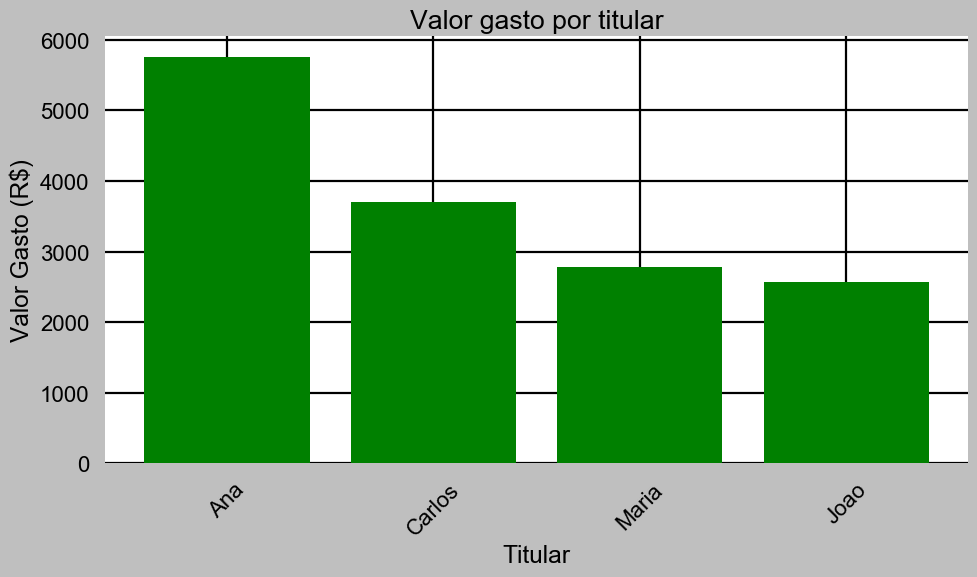

In [72]:
#valor_gasto_por_titular

plt.figure(figsize=(10, 6))
plt.bar(valor_gasto_por_titular['Nome'], valor_gasto_por_titular['ValorCompra'], color='green')
plt.title('Valor gasto por titular')
plt.xlabel('Titular')
plt.ylabel('Valor Gasto (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



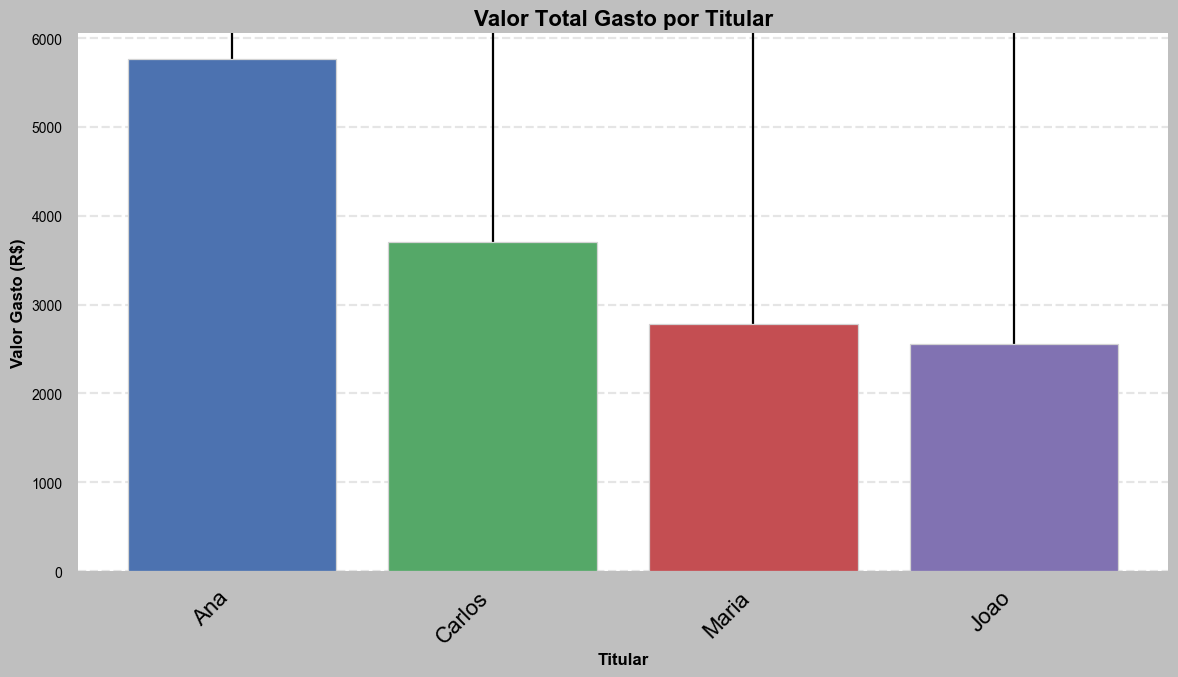

In [90]:
#valor_gasto_por_titular

plt.style.use('grayscale')
plt.figure(figsize=(12, 7)) # Aumentei um pouco o tamanho para melhor visualização
# Definindo uma paleta de cores (exemplo com cores do seaborn, mas pode ser qualquer lista)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD'] # Exemplo de cores
plt.bar(valor_gasto_por_titular['Nome'], valor_gasto_por_titular['ValorCompra'],
        color=colors[:len(valor_gasto_por_titular)], # Usa cores da lista, repetindo se necessário
        edgecolor='lightgray', # Adiciona borda preta
        linewidth=0.9) # Define a espessura da borda

plt.title('Valor Total Gasto por Titular', fontsize=16, fontweight='bold') # Título maior e em negrito
plt.xlabel('Titular', fontsize=12, fontweight='bold') # Rótulo do eixo X maior e em negrito
plt.ylabel('Valor Gasto (R$)', fontsize=12, fontweight='bold') # Rótulo do eixo Y maior e em negrito
plt.xticks(rotation=45, ha='right') # Rotação e alinhamento dos rótulos do eixo X
plt.yticks(fontsize=10) # Tamanho da fonte dos rótulos do eixo Y

plt.grid(axis='y', linestyle='--', alpha=0.10) # Adiciona um grid horizontal leve
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


* Gráfico dos gastos por categoria

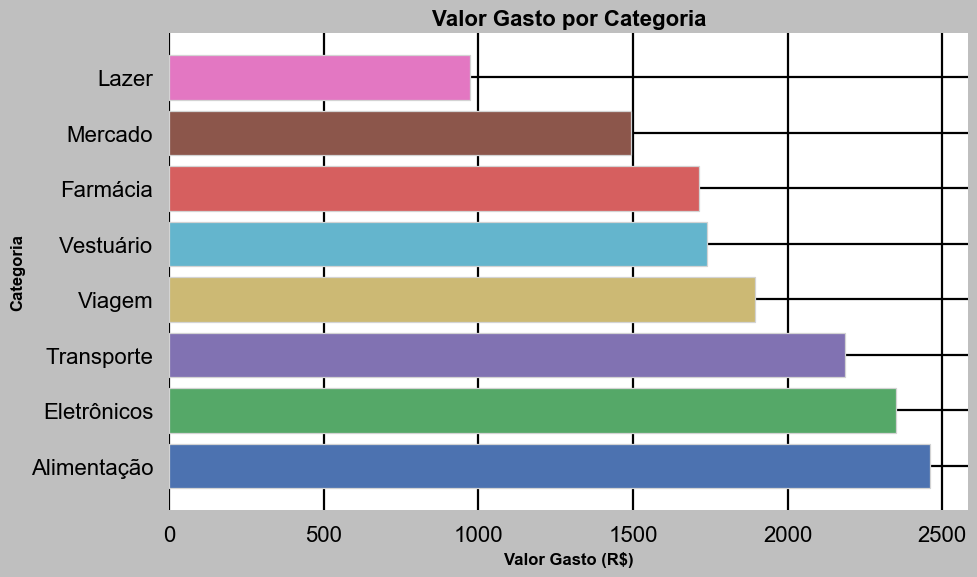

In [97]:
plt.style.use('grayscale')
plt.figure(figsize=(10, 6))
colors = ['#4C72B0', '#55A868', '#8172B2', '#CCB974', '#64B5CD', '#D65F5F', '#8C564B', '#E377C2', '#7F7F7F', '#C80E59' ] # Exemplo de cores
plt.barh(valor_gasto_por_categoria['categoria'], valor_gasto_por_categoria['ValorCompra'], color=colors[:len(valor_gasto_por_categoria)],
        edgecolor='lightgray', # Adiciona borda preta
        linewidth=0.9) # Define a espessura da borda
plt.title('Valor Gasto por Categoria', fontsize=16, fontweight='bold')
plt.xlabel('Valor Gasto (R$)', fontsize=12, fontweight='bold')
plt.ylabel('Categoria', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

* Gastos por titular (pizza)

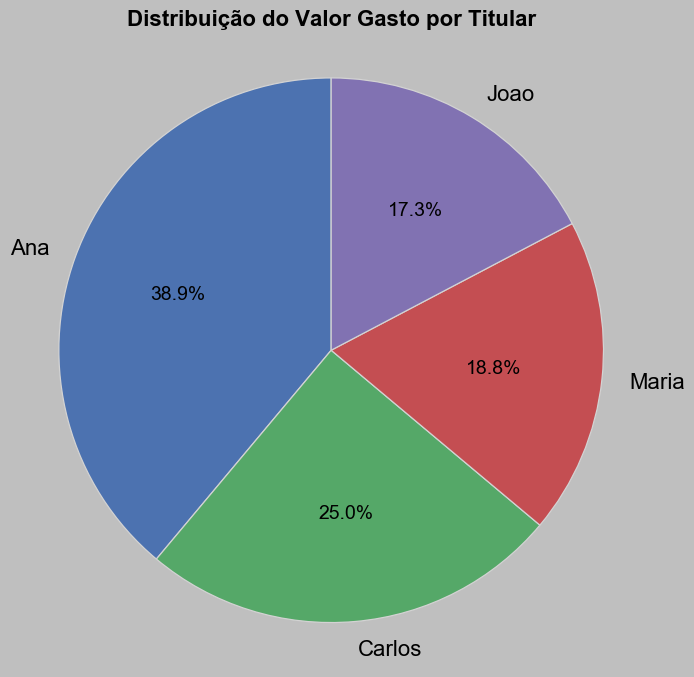

In [101]:
#valor_gasto_por_titular - Gráfico de Pizza

plt.style.use('grayscale') # Mantém o estilo em escala de cinza, se desejar
plt.figure(figsize=(7, 7)) # Gráficos de pizza geralmente ficam melhores em figuras quadradas

# Definindo uma paleta de cores (reutilizando a lista, mas pode ser ajustada)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

plt.pie(valor_gasto_por_titular['ValorCompra'],
        labels=valor_gasto_por_titular['Nome'], # Usamos os nomes como rótulos
        colors=colors[:len(valor_gasto_por_titular)], # Usa cores da lista
        autopct='%1.1f%%', # Formato para exibir as porcentagens em cada fatia
        startangle=90, # Começa a primeira fatia no topo (opcional)
        wedgeprops={'edgecolor': 'lightgray', 'linewidth': 0.9}) # Adiciona bordas às fatias

plt.title('Distribuição do Valor Gasto por Titular', fontsize=16, fontweight='bold') # Título apropriado para gráfico de pizza

# Opcional: Garante que o gráfico de pizza seja desenhado como um círculo
plt.axis('equal')

plt.tight_layout() # Ajusta o layout
plt.show()
